# Part 1: The Gravitational Potential of the Earth

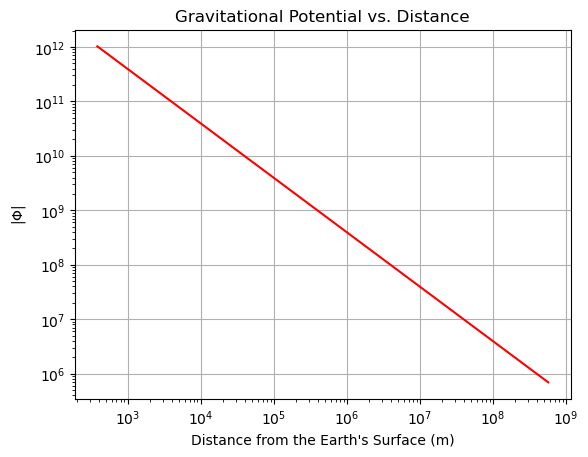

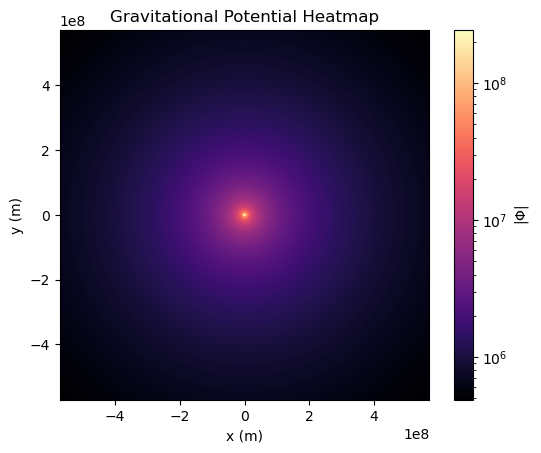

In [20]:
# Part 1
import numpy as np
import matplotlib.pyplot as plt

# Defining Variables
G = 6.67*10**(-11)           # m^3/kg/s^2
massEarth = 5.9*10**24       # kg
radiusEarth = 6.378*10*6     # m
distEarthToMoon = 3.8*10**8  # m
# Number 1: Defining a function
def gravPotential(M, xM, yM, x, y):
    r = np.sqrt((x-xM)**2 + (y-yM)**2)
    return -G*M/r
    
# Number 2: 1D Plot
xVals = np.linspace(radiusEarth, 1.5*distEarthToMoon, 1000)
potential = np.abs(gravPotential(massEarth, 0, 0 , xVals, np.zeros_like(xVals)))
fig, ax= plt.subplots()
ax.plot(xVals, potential, color='r')
ax.set_title("Gravitational Potential vs. Distance")
ax.set_xlabel("Distance from the Earth's Surface (m)")
ax.set_ylabel(r'$|\Phi|$')
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()

# Number 3: 2D Mesh Plot
#Variables
grid_size = 500
xRange = np.linspace(-1.5 * distEarthToMoon, 1.5 * distEarthToMoon, grid_size)
yRange = np.linspace(-1.5 * distEarthToMoon, 1.5 * distEarthToMoon, grid_size)
X, Y = np.meshgrid(xRange, yRange)
Phi = np.abs(gravPotential(massEarth, 0, 0, X, Y))

fig, ax2=plt.subplots()
mesh = ax2.pcolormesh(X, Y, Phi, shading='auto', norm=plt.matplotlib.colors.LogNorm(), cmap='magma')
cbar = fig.colorbar(mesh, ax=ax2, label=r'$|\Phi|$') # add variables
ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)")
ax2.set_title("Gravitational Potential Heatmap")
ax2.set_aspect('equal')